### **Effect of Outlier**

In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/Ads/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

<ipython-input-3-7966e07e892a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


In [4]:
df = df.drop(['User ID', 'Gender'], axis=1)

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
190,24,84000,0
311,39,96000,1
303,37,79000,1
281,35,61000,0
223,60,102000,1


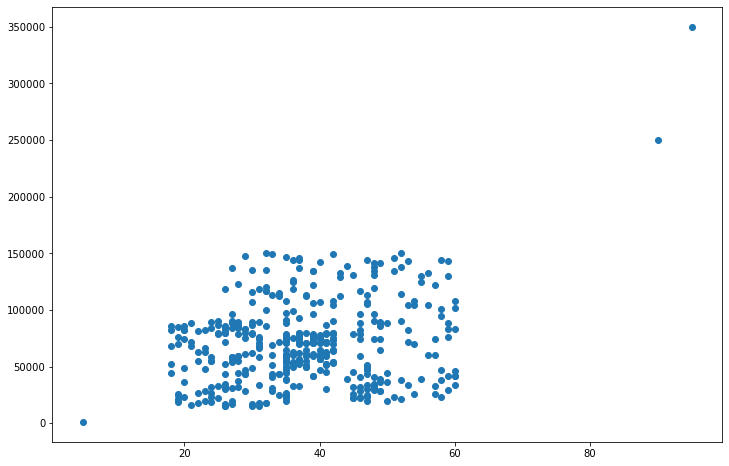

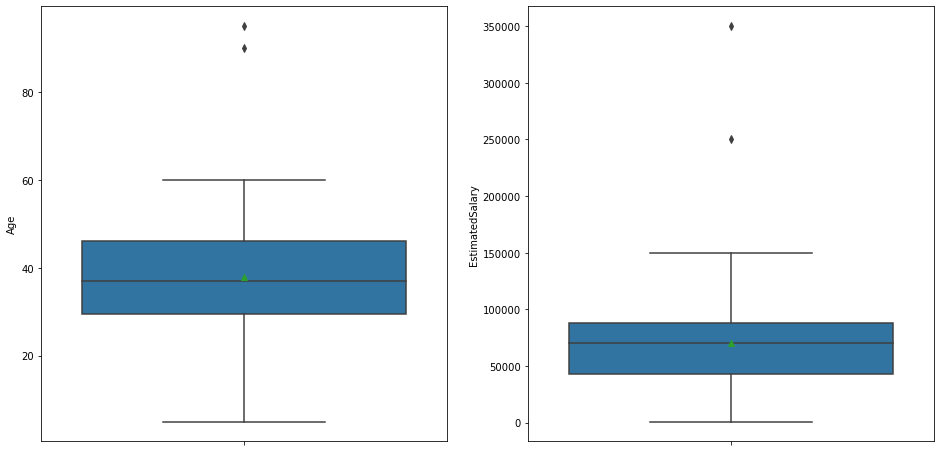

In [32]:
plt.figure(1, figsize=(12, 8))
plt.scatter(df['Age'], df['EstimatedSalary'])
plt.show()

plt.figure(2, figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Age', showmeans=True)
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='EstimatedSalary', showmeans=True)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.iloc[:, [0, 1]]
Y = df.iloc[:, -1]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

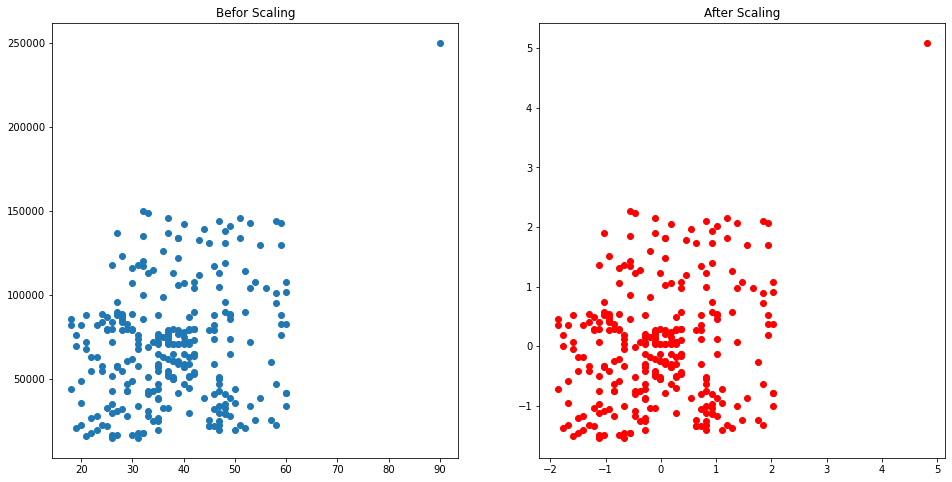

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Befor Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")

plt.show()

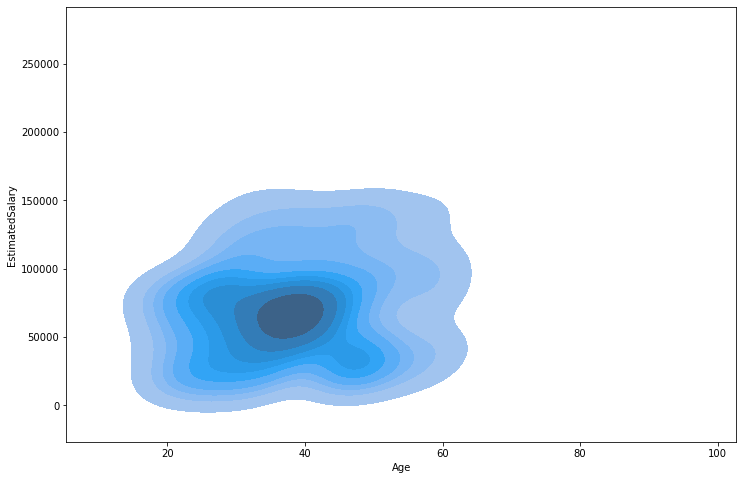

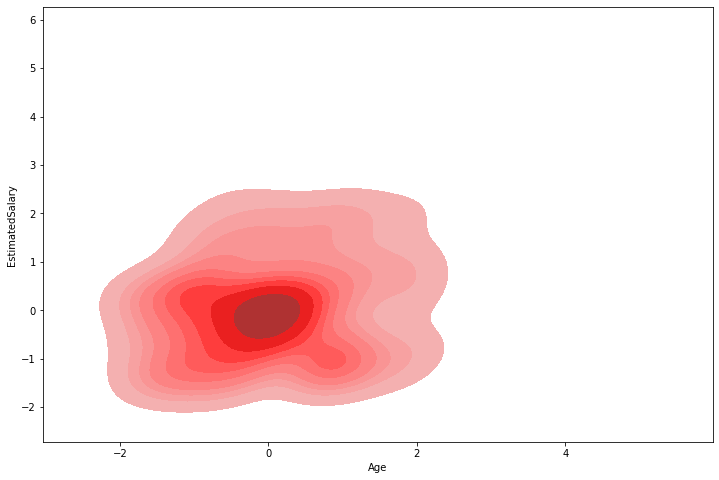

In [12]:
plt.figure(1, figsize=(12, 8))
sns.kdeplot(data=X_train, x='Age', y='EstimatedSalary', fill=True)

plt.figure(2, figsize=(12, 8))
sns.kdeplot(data=X_train_scaled, x='Age', y='EstimatedSalary', color='red', fill=True)

plt.show()

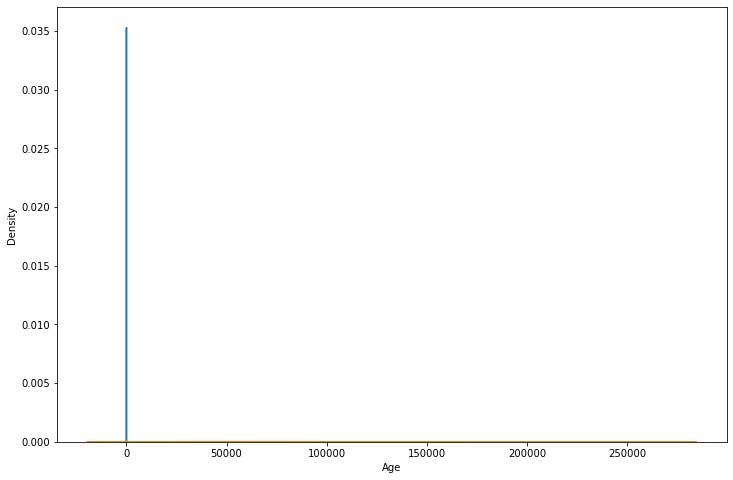

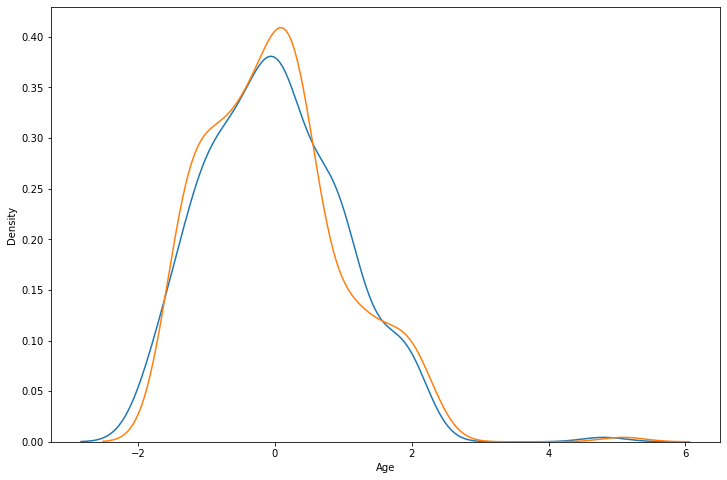

In [13]:
# befor scaling
plt.figure(1, figsize=(12, 8))
sns.kdeplot(data=X_train, x='Age')
sns.kdeplot(data=X_train, x='EstimatedSalary')
plt.show()

# after scaling
plt.figure(2, figsize=(12, 8))
sns.kdeplot(data=X_train_scaled, x='Age')
sns.kdeplot(data=X_train_scaled, x='EstimatedSalary')
plt.show()

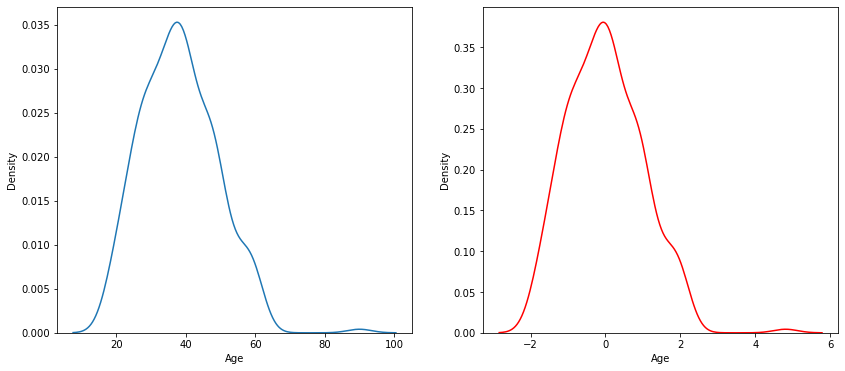

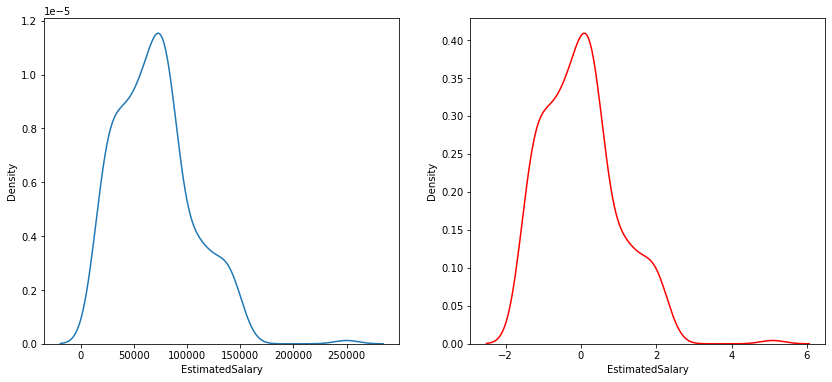

In [14]:
# befor scaling
plt.figure(1, figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=X_train, x='Age')
plt.subplot(1, 2, 2)
sns.kdeplot(data=X_train_scaled, x='Age', color='r')
plt.show()

# after scaling
plt.figure(2, figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=X_train, x='EstimatedSalary')
plt.subplot(1, 2, 2)
sns.kdeplot(data=X_train_scaled, x='EstimatedSalary', color='r')
plt.show()

### **Logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(X_train, Y_train)
lr_scaled.fit(X_train_scaled, Y_train)

Y_pred = lr.predict(X_test)
Y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [16]:
from sklearn.metrics import accuracy_score
print("Actual : ", accuracy_score(Y_test, Y_pred)*100)
print("Scaled : ", accuracy_score(Y_test, Y_pred_scaled)*100)

Actual :  62.8099173553719
Scaled :  82.64462809917356


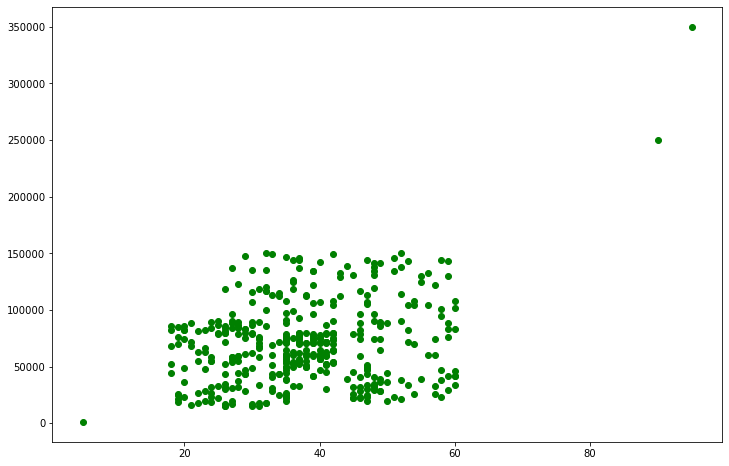

In [17]:
plt.figure(1, figsize=(12, 8))
plt.scatter(df['Age'], df['EstimatedSalary'], color='g')
plt.show()

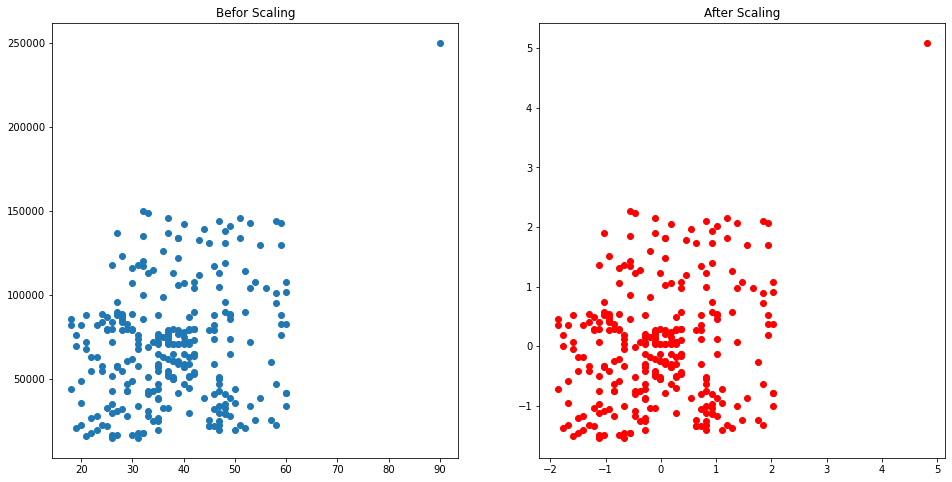

In [18]:
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(X_train['Age'], X_train['EstimatedSalary'])
plt.title("Befor Scaling")
plt.subplot(1, 2, 2)
plt.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='r')
plt.title("After Scaling")
plt.show()

### **Decision Tree**

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

dt.fit(X_train, Y_train)
dt_scaled.fit(X_train_scaled, Y_train)

Y_pred = dt.predict(X_test)
Y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [20]:
from sklearn.metrics import accuracy_score
print("Actual : ", accuracy_score(Y_test, Y_pred)*100)
print("Scaled : ", accuracy_score(Y_test, Y_pred_scaled)*100)

Actual :  83.47107438016529
Scaled :  84.29752066115702
